In [627]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix



In [628]:
df = pd.read_csv('/Users/mrbinit/Downloads/chrun.zip')

In [629]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [630]:
df.shape

(7043, 21)

In [631]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [632]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [633]:
df = df.drop('customerID', axis = 1)

### Contract

In [634]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [635]:
def contract (x):
    if x == 'Month-to-month':
        return 'month-to-month-contract'
    elif x == 'Two year':
        return 'two-year-contract'
    else:
        return 'one_year-contract'
df['Contract'] = df['Contract'].apply(contract)
# day_copy = day_copy.drop('workingday', axis = 1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,month-to-month-contract,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,one_year-contract,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,month-to-month-contract,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,one_year-contract,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,month-to-month-contract,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,one_year-contract,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,one_year-contract,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,month-to-month-contract,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,month-to-month-contract,Yes,Mailed check,74.40,306.6,Yes


In [636]:
contract_dummy = pd.get_dummies(df.Contract, drop_first = True)
contract_dummy  = contract_dummy .astype(int)
contract_dummy 

,one_year-contract,two-year-contract
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
7038,1,0
7039,1,0
7040,0,0
7041,0,0


In [ ]:
# Assuming df.Contract.value_counts() is provided earlier
contract_counts = df.Contract.value_counts()

# Create the bar plot
plt.figure(figsize=(9, 6))
sns.barplot(y=contract_counts.values, x=contract_counts.index, palette='Set2')
plt.title('Distribution of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

### Gender

In [637]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Male Ratio: 0.50
Female Ratio: 0.50


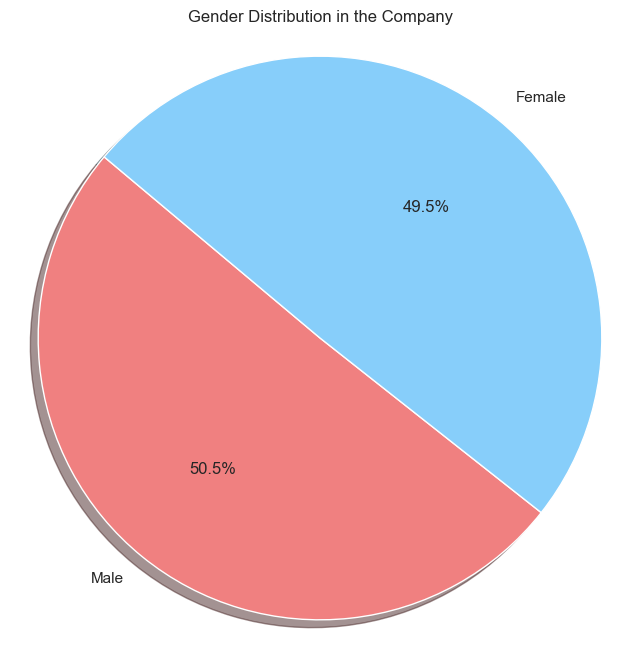

In [638]:
gender_counts = df.gender.value_counts()
male_ratio = gender_counts['Male'] / (gender_counts['Male'] + gender_counts['Female'])
female_ratio = gender_counts['Female'] / (gender_counts['Male'] + gender_counts['Female'])

print(f"Male Ratio: {male_ratio:.2f}")
print(f"Female Ratio: {female_ratio:.2f}")

plt.figure(figsize=(8, 8))
labels = gender_counts.index
sizes = gender_counts.values
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Gender Distribution in the Company')
plt.show()

In [639]:
gender_dummy = pd.get_dummies(df.gender, drop_first = True)
gender_dummy  = gender_dummy.astype(int)
gender_dummy

,Male
0,0
1,1
2,1
3,1
4,0
...,...
7038,1
7039,0
7040,0
7041,1


### senior citizen

In [640]:
df.SeniorCitizen.value_counts()


0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [641]:
def SeniorCitizen(x):
    if x == 0:
        return 'no_senior_citizen'
    else:
        return 'yes_senior_citizen'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(SeniorCitizen)

In [642]:
df['SeniorCitizen'].value_counts()

no_senior_citizen     5901
yes_senior_citizen    1142
Name: SeniorCitizen, dtype: int64

Senior Citizens Ratio: 0.16
Others Ratio: 0.84


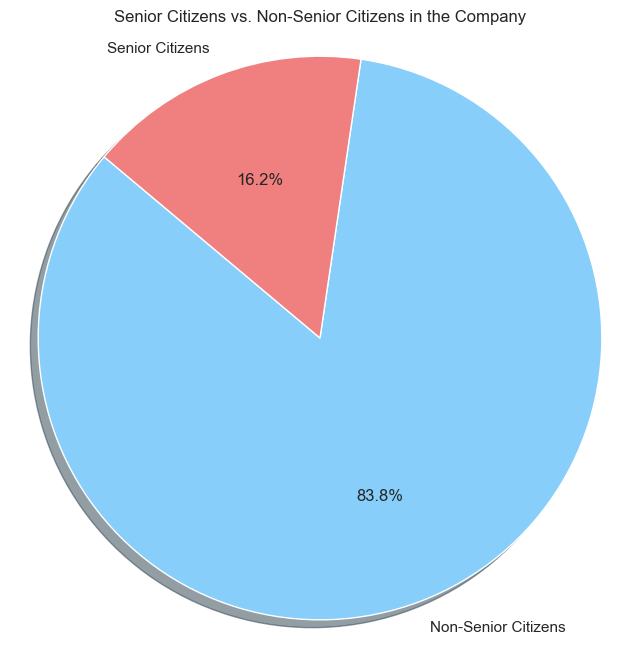

In [643]:
senior_counts = df.SeniorCitizen.value_counts()

senior_ratio = senior_counts[1] / (senior_counts[0] + senior_counts[1])
others_ratio = senior_counts[0] / (senior_counts[0] + senior_counts[1])

print(f"Senior Citizens Ratio: {senior_ratio:.2f}")
print(f"Others Ratio: {others_ratio:.2f}")
plt.figure(figsize=(8, 8))
labels = ['Non-Senior Citizens', 'Senior Citizens']
sizes = senior_counts.values
colors = ['lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Senior Citizens vs. Non-Senior Citizens in the Company')
plt.show()

In [644]:

SeniorCitizen_dummy = pd.get_dummies(df.SeniorCitizen, drop_first = True)
SeniorCitizen_dummy  = SeniorCitizen_dummy.astype(int)
SeniorCitizen_dummy

,yes_senior_citizen
0,0
1,0
2,0
3,0
4,0
...,...
7038,0
7039,0
7040,0
7041,1


### Partner

In [645]:
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [646]:
def Partner (x):
    if x == 'No':
        return 'no_partner'
    else:
        return 'yes_partner'
df['Partner'] = df['Partner'].apply(Partner)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no_senior_citizen,yes_partner,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,month-to-month-contract,Yes,Electronic check,29.85,29.85,No
1,Male,no_senior_citizen,no_partner,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,one_year-contract,No,Mailed check,56.95,1889.5,No
2,Male,no_senior_citizen,no_partner,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,month-to-month-contract,Yes,Mailed check,53.85,108.15,Yes
3,Male,no_senior_citizen,no_partner,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,one_year-contract,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,no_senior_citizen,no_partner,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,month-to-month-contract,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,no_senior_citizen,yes_partner,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,one_year-contract,Yes,Mailed check,84.80,1990.5,No
7039,Female,no_senior_citizen,yes_partner,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,one_year-contract,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,no_senior_citizen,yes_partner,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,month-to-month-contract,Yes,Electronic check,29.60,346.45,No
7041,Male,yes_senior_citizen,yes_partner,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,month-to-month-contract,Yes,Mailed check,74.40,306.6,Yes


Employees with Partners Ratio: 0.48
Employees without Partners Ratio: 0.52


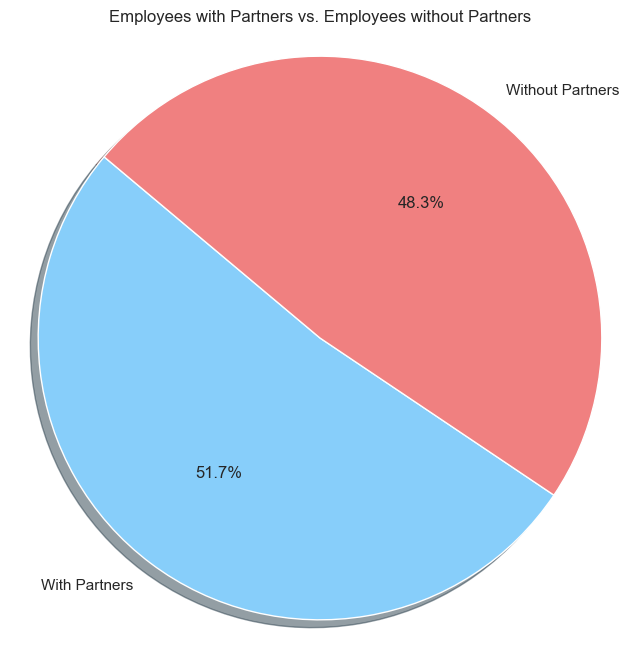

In [647]:
partner_counts = df.Partner.value_counts()
with_partner_ratio = partner_counts['yes_partner'] / (partner_counts['yes_partner'] + partner_counts['no_partner'])
without_partner_ratio = partner_counts['no_partner'] / (partner_counts['yes_partner'] + partner_counts['no_partner'])

print(f"Employees with Partners Ratio: {with_partner_ratio:.2f}")
print(f"Employees without Partners Ratio: {without_partner_ratio:.2f}")
plt.figure(figsize=(8, 8))
labels = ['With Partners', 'Without Partners']
sizes = partner_counts.values
colors = ['lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Employees with Partners vs. Employees without Partners')
plt.show()

In [648]:
Partner_dummy = pd.get_dummies(df.Partner, drop_first = True)
Partner_dummy  = Partner_dummy.astype(int)
Partner_dummy

,yes_partner
0,1
1,0
2,0
3,0
4,0
...,...
7038,1
7039,1
7040,1
7041,1


### Dependent

In [649]:
df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [650]:
def Dependents (x):
    if x == 'No':
        return 'no_dependents'
    else:
        return 'yes_dependents'
df['Dependents'] = df['Dependents'].apply(Dependents)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no_senior_citizen,yes_partner,no_dependents,1,No,No phone service,DSL,No,Yes,No,No,No,No,month-to-month-contract,Yes,Electronic check,29.85,29.85,No
1,Male,no_senior_citizen,no_partner,no_dependents,34,Yes,No,DSL,Yes,No,Yes,No,No,No,one_year-contract,No,Mailed check,56.95,1889.5,No
2,Male,no_senior_citizen,no_partner,no_dependents,2,Yes,No,DSL,Yes,Yes,No,No,No,No,month-to-month-contract,Yes,Mailed check,53.85,108.15,Yes
3,Male,no_senior_citizen,no_partner,no_dependents,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,one_year-contract,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,no_senior_citizen,no_partner,no_dependents,2,Yes,No,Fiber optic,No,No,No,No,No,No,month-to-month-contract,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,no_senior_citizen,yes_partner,yes_dependents,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,one_year-contract,Yes,Mailed check,84.80,1990.5,No
7039,Female,no_senior_citizen,yes_partner,yes_dependents,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,one_year-contract,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,no_senior_citizen,yes_partner,yes_dependents,11,No,No phone service,DSL,Yes,No,No,No,No,No,month-to-month-contract,Yes,Electronic check,29.60,346.45,No
7041,Male,yes_senior_citizen,yes_partner,no_dependents,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,month-to-month-contract,Yes,Mailed check,74.40,306.6,Yes


Customers with Dependents Ratio: 0.30
Customers without Dependents Ratio: 0.70


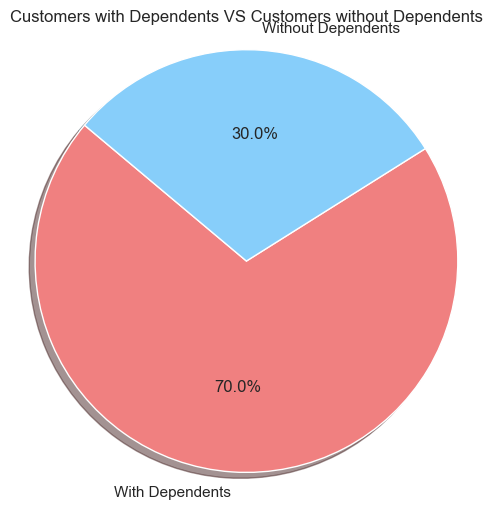

In [651]:
dependents_counts = df.Dependents.value_counts()
with_dependents_ratio = dependents_counts['yes_dependents'] / (dependents_counts['yes_dependents'] + dependents_counts['no_dependents'])
without_dependents_ratio = dependents_counts['no_dependents'] / (dependents_counts['yes_dependents'] + dependents_counts['no_dependents'])
print(f"Customers with Dependents Ratio: {with_dependents_ratio:.2f}")
print(f"Customers without Dependents Ratio: {without_dependents_ratio:.2f}")
plt.figure(figsize=(6, 6))
labels = ['With Dependents', 'Without Dependents']
sizes = dependents_counts.values
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Customers with Dependents VS Customers without Dependents')
plt.show()

In [652]:
Dependents_dummy = pd.get_dummies(df.Dependents, drop_first = True)
Dependents_dummy  = Dependents_dummy.astype(int)
Dependents_dummy

,yes_dependents
0,0
1,0
2,0
3,0
4,0
...,...
7038,1
7039,1
7040,1
7041,0


In [653]:
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

### Phone service

In [654]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [655]:
def PhoneService(x):
    if x == 'Yes':
        return 'yes_PhoneService'
    else:
        return 'no_PhoneService'

df['PhoneService'] = df['PhoneService'].apply(PhoneService)



In [656]:
df.PhoneService.value_counts()

yes_PhoneService    6361
no_PhoneService      682
Name: PhoneService, dtype: int64

Customers with Phone Service: 0.90
Customers without Phone Service: 0.10


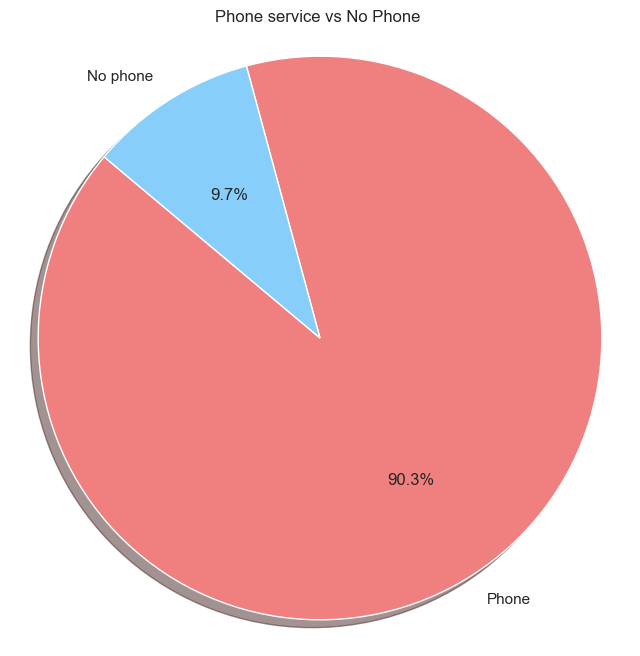

In [657]:
Phone_Service_Counts = df.PhoneService.value_counts()
with_dependents_ratio = Phone_Service_Counts['yes_PhoneService'] / (Phone_Service_Counts['yes_PhoneService'] + Phone_Service_Counts['no_PhoneService'])
without_dependents_ratio = Phone_Service_Counts['no_PhoneService'] / (Phone_Service_Counts['yes_PhoneService'] + Phone_Service_Counts['no_PhoneService'])
print(f"Customers with Phone Service: {with_dependents_ratio:.2f}")
print(f"Customers without Phone Service: {without_dependents_ratio:.2f}")
plt.figure(figsize=(8, 8))
labels = ['Phone', 'No phone']
sizes = Phone_Service_Counts.values
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Phone service vs No Phone ')
plt.show()

In [658]:
PhoneService_dummy = pd.get_dummies(df.PhoneService, drop_first = True)
PhoneService_dummy  = PhoneService_dummy.astype(int)
PhoneService_dummy

,yes_PhoneService
0,0
1,1
2,1
3,0
4,1
...,...
7038,1
7039,1
7040,0
7041,1


### Multiple lines


In [659]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [660]:
def MultipleLines (x):
    if x == 'No':
        return 'no_MultipleLines'
    else:
        return 'yes_internet_service'
df['MultipleLines'] = df['MultipleLines'].apply(MultipleLines)

In [661]:
MultipleLines_dummy = pd.get_dummies(df.MultipleLines, drop_first = True)
MultipleLines_dummy  = MultipleLines_dummy.astype(int)
MultipleLines_dummy

,yes_internet_service
0,1
1,0
2,0
3,1
4,0
...,...
7038,1
7039,1
7040,1
7041,1


Customers with Multiple Lines: 0.52
Customers without Multiple Lines: 0.48


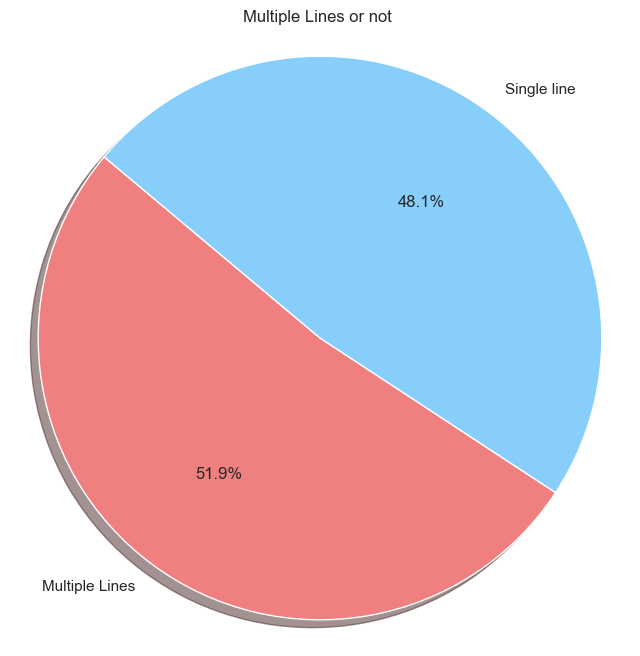

In [662]:
multiple_line_counts = df.MultipleLines.value_counts()

# Calculate ratios
with_dependents_ratio = multiple_line_counts['yes_internet_service'] / (multiple_line_counts['yes_internet_service'] + multiple_line_counts['no_MultipleLines'])
without_dependents_ratio = multiple_line_counts['no_MultipleLines'] / (multiple_line_counts['yes_internet_service'] + multiple_line_counts['no_MultipleLines'])

# Print ratios
print(f"Customers with Multiple Lines: {with_dependents_ratio:.2f}")
print(f"Customers without Multiple Lines: {without_dependents_ratio:.2f}")

# Create the pie chart
plt.figure(figsize=(8, 8))
labels = ['Multiple Lines', 'Single line']  # Update labels
sizes = [with_dependents_ratio, without_dependents_ratio]  # Update sizes
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Multiple Lines or not ')
plt.show()

### Internet Service

In [663]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [664]:
def InternetService (x):
    if x == 'Fiber optic':
        return 'Fiber_optic'
    elif x == 'DSL':
        return 'DSL'
    else:
        return 'No_internet_service'
df['InternetService'] = df['InternetService'].apply(InternetService)

In [665]:
InternetService_dummy = pd.get_dummies(df.InternetService, drop_first = True)
InternetService_dummy  = InternetService_dummy.astype(int)
InternetService_dummy

,Fiber_optic,No_internet_service
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
7038,0,0
7039,1,0
7040,0,0
7041,1,0


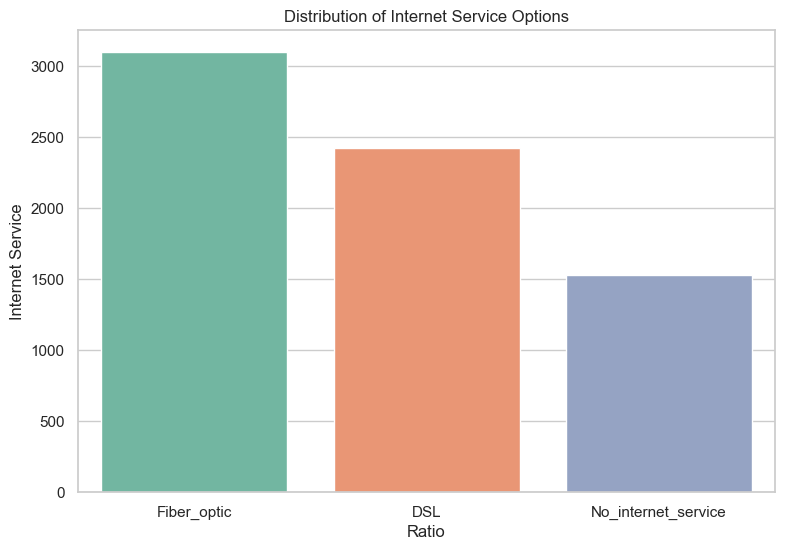

In [666]:
internet_service_counts = df.InternetService.value_counts()
plt.figure(figsize=(9, 6))
sns.barplot(y=internet_service_counts.values, x=internet_service_counts.index, palette= 'Set2')
plt.title('Distribution of Internet Service Options')
plt.xlabel('Ratio')
plt.ylabel('Internet Service')
plt.show()

### Online backup

In [667]:
df.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [668]:
def OnlineBackup (x):
    if x == 'No':
        return 'no_OnlineBackup'
    elif x == 'Yes':
        return 'yes_OnlineBackup'
    else:
        return 'No_internet_service'
df['OnlineBackup'] = df['OnlineBackup'].apply(OnlineBackup)

In [669]:
OnlineBackup_dummy = pd.get_dummies(df.OnlineBackup, drop_first = True)
OnlineBackup_dummy  = OnlineBackup_dummy.astype(int)
OnlineBackup_dummy

,no_OnlineBackup,yes_OnlineBackup
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
7038,1,0
7039,0,1
7040,1,0
7041,1,0


Customers with Online Backup: 0.44
Customers without Online Backup: 0.56


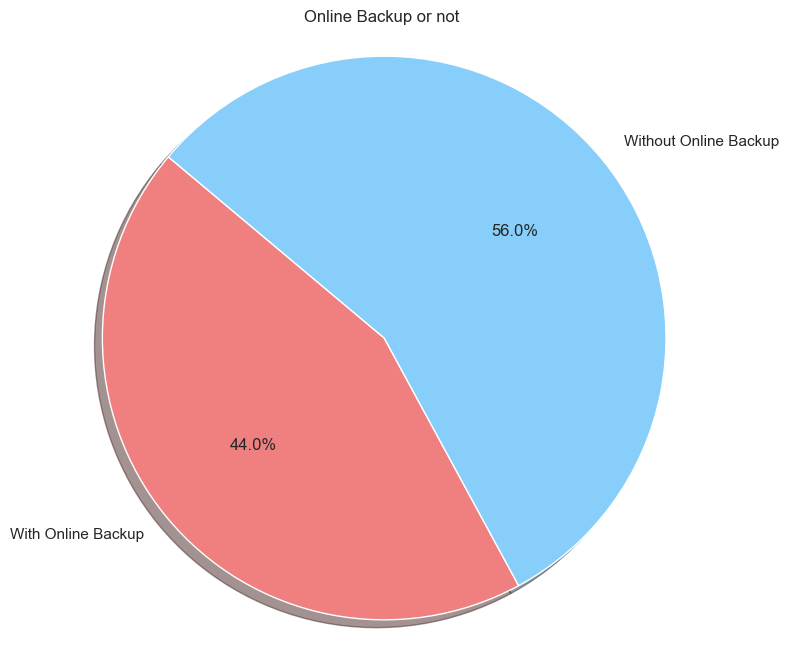

In [670]:
online_backup_counts = df.OnlineBackup.value_counts()
# Calculate ratios
with_online_backup_ratio = online_backup_counts['yes_OnlineBackup'] / (online_backup_counts['yes_OnlineBackup'] + online_backup_counts['no_OnlineBackup'])
without_online_backup_ratio = online_backup_counts['no_OnlineBackup'] / (online_backup_counts['yes_OnlineBackup'] + online_backup_counts['no_OnlineBackup'])

# Print ratios
print(f"Customers with Online Backup: {with_online_backup_ratio:.2f}")
print(f"Customers without Online Backup: {without_online_backup_ratio:.2f}")

# Create the pie chart
plt.figure(figsize=(8, 8))
labels = ['With Online Backup', 'Without Online Backup']  # Update labels
sizes = [with_online_backup_ratio, without_online_backup_ratio]  # Update sizes
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Online Backup or not ')
plt.show()

### Device protection

In [671]:
df.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [672]:
def DeviceProtection (x):
    if x == 'No':
        return 'no_DeviceProtection'
    elif x == 'Yes':
        return 'yes_DeviceProtection'
    else:
        return 'No_internet_service'
df['DeviceProtection'] = df['DeviceProtection'].apply(DeviceProtection)

In [673]:
DeviceProtection_dummy = pd.get_dummies(df.DeviceProtection, drop_first = True)
DeviceProtection_dummy  = DeviceProtection_dummy.astype(int)
DeviceProtection_dummy

,no_DeviceProtection,yes_DeviceProtection
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
7038,0,1
7039,0,1
7040,1,0
7041,1,0


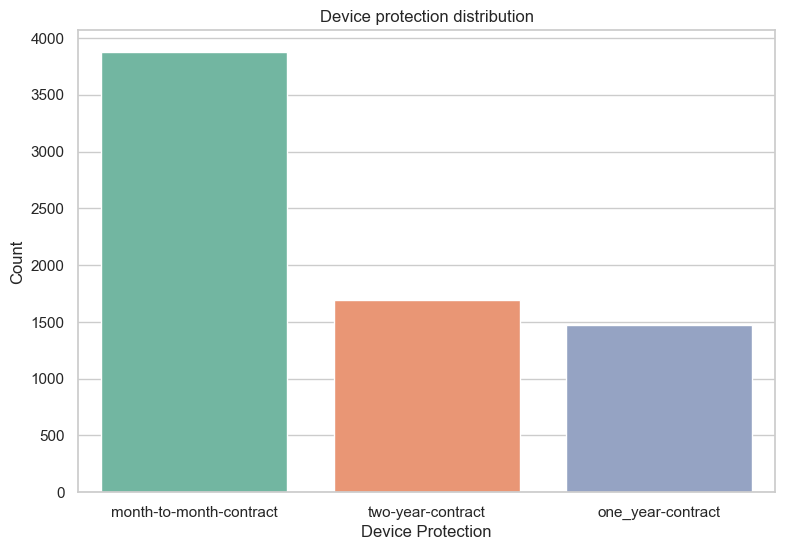

In [674]:
device_protection_counts = df.DeviceProtection.value_counts()

device_protection_counts = df.Contract.value_counts()

# Create the bar plot
plt.figure(figsize=(9, 6))
sns.barplot(y=device_protection_counts.values, x=device_protection_counts.index, palette='Set2')
plt.title('Device protection distribution')
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.show()

### Tech support

In [675]:
df.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [676]:
def TechSupport (x):
    if x == 'No':
        return 'no_TechSupport'
    elif x == 'Yes':
        return 'yes_TechSupport'
    else:
        return 'No_internet_service'
df['TechSupport'] = df['TechSupport'].apply(TechSupport)

In [677]:
TechSupport_dummy = pd.get_dummies(df.TechSupport, drop_first = True)
TechSupport_dummy  = TechSupport_dummy.astype(int)
TechSupport_dummy

,no_TechSupport,yes_TechSupport
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
7038,0,1
7039,1,0
7040,1,0
7041,1,0


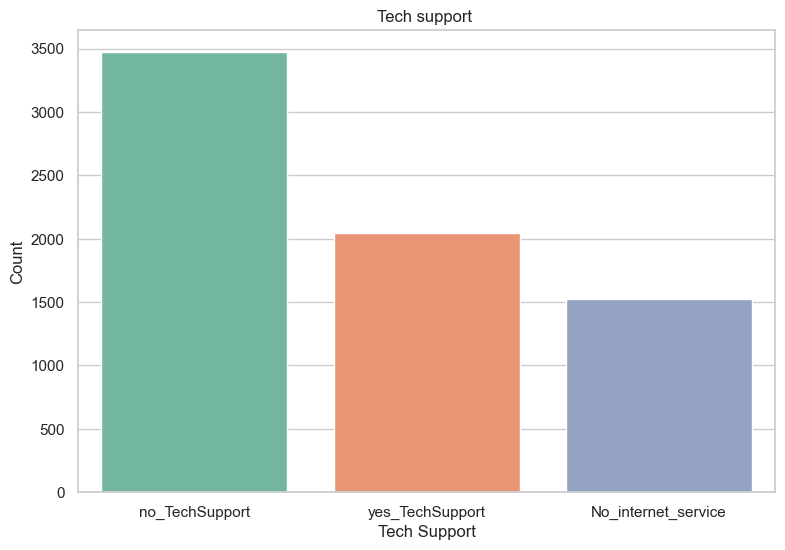

In [678]:
Texh_Support_counts = df.TechSupport.value_counts()


# Create the bar plot
plt.figure(figsize=(9, 6))
sns.barplot(y=Texh_Support_counts.values, x=Texh_Support_counts.index, palette='Set2')
plt.title('Tech support ')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()

### Streaming Tv 

In [679]:
df.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [680]:
def StreamingTV (x):
    if x == 'No':
        return 'no_StreamingTV'
    elif x == 'Yes':
        return 'yes_StreamingTV'
    else:
        return 'No_internet_service'
df['StreamingTV'] = df['StreamingTV'].apply(StreamingTV)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no_senior_citizen,yes_partner,no_dependents,1,no_PhoneService,yes_internet_service,DSL,No,yes_OnlineBackup,no_DeviceProtection,no_TechSupport,no_StreamingTV,No,month-to-month-contract,Yes,Electronic check,29.85,29.85,No
1,Male,no_senior_citizen,no_partner,no_dependents,34,yes_PhoneService,no_MultipleLines,DSL,Yes,no_OnlineBackup,yes_DeviceProtection,no_TechSupport,no_StreamingTV,No,one_year-contract,No,Mailed check,56.95,1889.5,No
2,Male,no_senior_citizen,no_partner,no_dependents,2,yes_PhoneService,no_MultipleLines,DSL,Yes,yes_OnlineBackup,no_DeviceProtection,no_TechSupport,no_StreamingTV,No,month-to-month-contract,Yes,Mailed check,53.85,108.15,Yes
3,Male,no_senior_citizen,no_partner,no_dependents,45,no_PhoneService,yes_internet_service,DSL,Yes,no_OnlineBackup,yes_DeviceProtection,yes_TechSupport,no_StreamingTV,No,one_year-contract,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,no_senior_citizen,no_partner,no_dependents,2,yes_PhoneService,no_MultipleLines,Fiber_optic,No,no_OnlineBackup,no_DeviceProtection,no_TechSupport,no_StreamingTV,No,month-to-month-contract,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,no_senior_citizen,yes_partner,yes_dependents,24,yes_PhoneService,yes_internet_service,DSL,Yes,no_OnlineBackup,yes_DeviceProtection,yes_TechSupport,yes_StreamingTV,Yes,one_year-contract,Yes,Mailed check,84.80,1990.5,No
7039,Female,no_senior_citizen,yes_partner,yes_dependents,72,yes_PhoneService,yes_internet_service,Fiber_optic,No,yes_OnlineBackup,yes_DeviceProtection,no_TechSupport,yes_StreamingTV,Yes,one_year-contract,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,no_senior_citizen,yes_partner,yes_dependents,11,no_PhoneService,yes_internet_service,DSL,Yes,no_OnlineBackup,no_DeviceProtection,no_TechSupport,no_StreamingTV,No,month-to-month-contract,Yes,Electronic check,29.60,346.45,No
7041,Male,yes_senior_citizen,yes_partner,no_dependents,4,yes_PhoneService,yes_internet_service,Fiber_optic,No,no_OnlineBackup,no_DeviceProtection,no_TechSupport,no_StreamingTV,No,month-to-month-contract,Yes,Mailed check,74.40,306.6,Yes


In [681]:
StreamingTV_dummy = pd.get_dummies(df.StreamingTV, drop_first = True)
StreamingTV_dummy  = StreamingTV_dummy.astype(int)
StreamingTV_dummy

,no_StreamingTV,yes_StreamingTV
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7038,0,1
7039,0,1
7040,1,0
7041,1,0


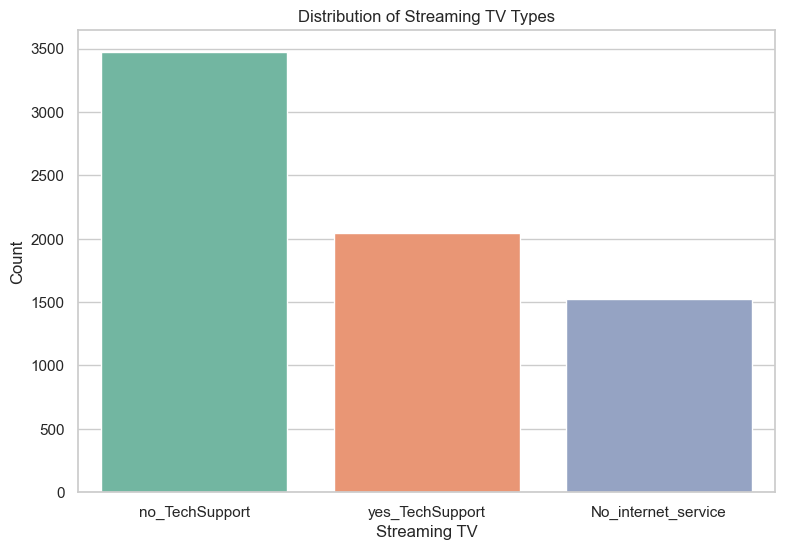

In [682]:
Streaming_Service_counts = df.TechSupport.value_counts()


# Create the bar plot
plt.figure(figsize=(9, 6))
sns.barplot(y=Streaming_Service_counts.values, x=Streaming_Service_counts.index, palette='Set2')
plt.title('Distribution of Streaming TV Types')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.show()

### Streaming movies

In [683]:
df.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [684]:
def StreamingMovies (x):
    if x == 'Yes':
        return 'yes_StreamingMovies'
    elif x == 'No':
        return 'No_StreamingMovies'
    else:
        return 'No_internet_service'
df['StreamingMovies'] = df['StreamingMovies'].apply(StreamingMovies)

In [685]:
StreamingMovies_dummy = pd.get_dummies(df.StreamingMovies, drop_first = True)
StreamingMovies_dummy  = StreamingMovies_dummy.astype(int)
StreamingMovies_dummy

,No_internet_service,yes_StreamingMovies
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
7038,0,1
7039,0,1
7040,0,0
7041,0,0


### Online security

In [686]:
df.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [687]:
def OnlineSecurity (x):
    if x == 'No':
        return 'no_OnlineSecurity'
    elif x == 'Yes':
        return 'yes_OnlineSecurity'
    else:
        return 'No_internet_service'
df['OnlineSecurity'] = df['OnlineSecurity'].apply(OnlineSecurity)

In [688]:
OnlineSecurity_dummy = pd.get_dummies(df.OnlineSecurity, drop_first = True)
OnlineSecurity_dummy  = OnlineSecurity_dummy.astype(int)
OnlineSecurity_dummy

,no_OnlineSecurity,yes_OnlineSecurity
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
7038,0,1
7039,1,0
7040,0,1
7041,1,0


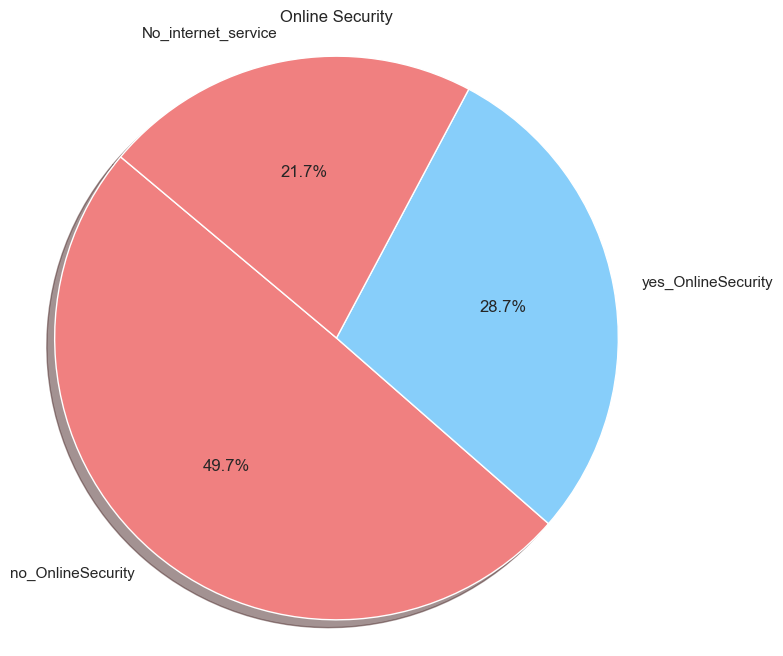

In [689]:
online_security_counts = df.OnlineSecurity.value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
labels = online_security_counts.index
sizes = online_security_counts.values
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Online Security')
plt.show()

### Paperless Billing

In [690]:
df.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [691]:
def PaperlessBilling (x):
    if x == 'No':
        return 'no_paperless_billing'
    else:
        return 'yes_paperless_billing'
df['SeniorCitizen'] = df['SeniorCitizen'].apply(SeniorCitizen)

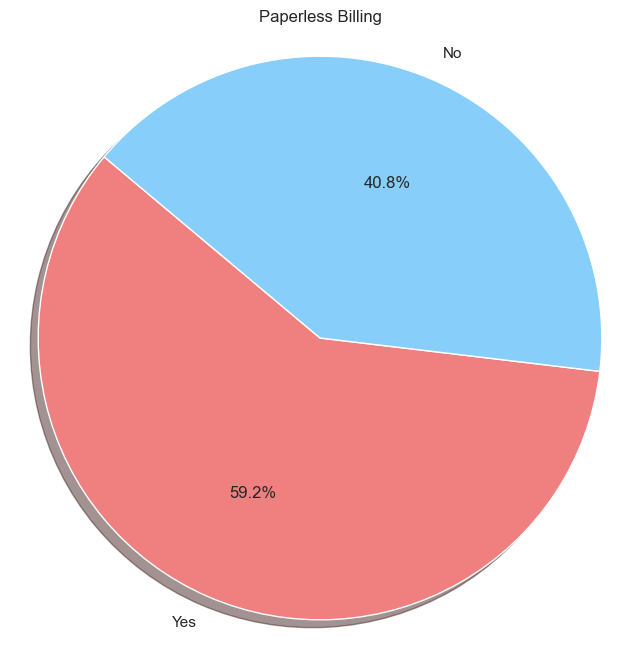

In [692]:
paperless_billing_counts = df.PaperlessBilling.value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
labels = paperless_billing_counts.index
sizes = paperless_billing_counts.values
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Paperless Billing')
plt.show()

In [693]:
PaperlessBilling_dummy = pd.get_dummies(df.PaperlessBilling, drop_first = True)
PaperlessBilling_dummy  = PaperlessBilling_dummy.astype(int)
PaperlessBilling_dummy

,Yes
0,1
1,0
2,1
3,0
4,1
...,...
7038,1
7039,1
7040,1
7041,1


### payment method 

In [694]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [695]:
def PaymentMethod(x):
    if x == 'Electronic check':
        return 'Electronic_check_PaymentMethod'
    elif x == 'Mailed check':
        return 'Mailed_check_PaymentMethod'
    elif x == 'Bank transfer (automatic)':
        return 'automatic_Bank_transfer_PaymentMethod'
    else:
        return 'automatic_Credit_card_PaymentMethod'

df['PaymentMethod'] = df['PaymentMethod'].apply(PaymentMethod)

In [696]:
df.PaymentMethod.value_counts()

Electronic_check_PaymentMethod           2365
Mailed_check_PaymentMethod               1612
automatic_Bank_transfer_PaymentMethod    1544
automatic_Credit_card_PaymentMethod      1522
Name: PaymentMethod, dtype: int64

In [697]:
PaymentMethod_dummy = pd.get_dummies(df.PaymentMethod, drop_first = True)
PaymentMethod_dummy  = PaymentMethod_dummy.astype(int)
PaymentMethod_dummy

,Mailed_check_PaymentMethod,automatic_Bank_transfer_PaymentMethod,automatic_Credit_card_PaymentMethod
0,0,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,0,0
...,...,...,...
7038,1,0,0
7039,0,0,1
7040,0,0,0
7041,1,0,0


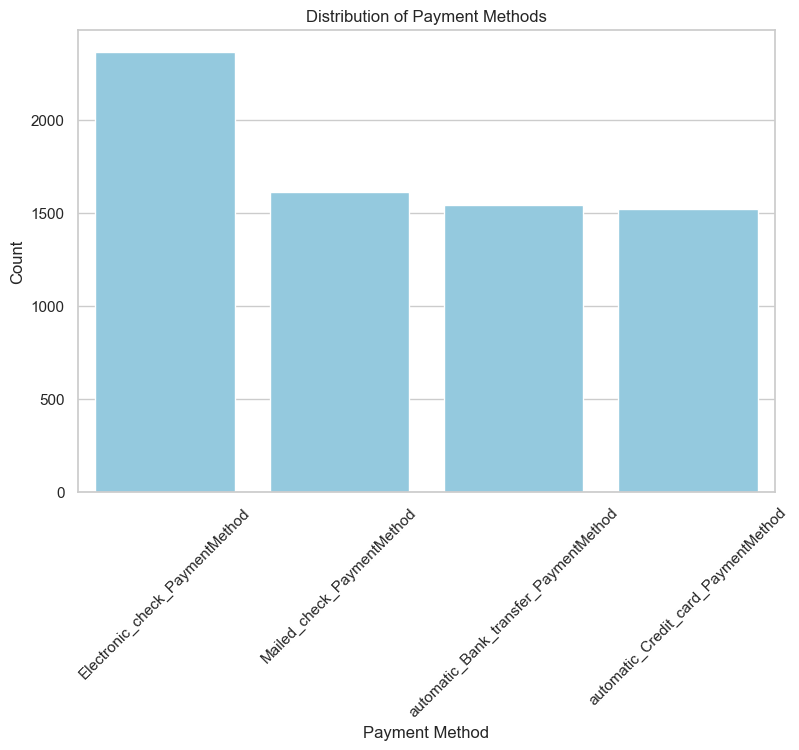

In [698]:
# Assuming df.PaymentMethod.value_counts() is provided earlier
payment_method_counts = df.PaymentMethod.value_counts()

# Create the bar plot
plt.figure(figsize=(9, 6))
sns.barplot(y=payment_method_counts.values, x=payment_method_counts.index, color='skyblue')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [699]:
df.MonthlyCharges.value_counts()   #### no need to do

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [700]:
df.TotalCharges.value_counts()  ####

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

### Chrun

In [701]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [702]:
def Churn (x):
    if x == 'No':
        return 'no_Churn'
    elif x == '1':
        return 'yes_Churn'
    else:
        return 'No_internet_service'
df['Churn'] = df['Churn'].apply(Churn)

In [703]:
Churn_dummy = pd.get_dummies(df.Churn, drop_first = True)
Churn_dummy  = Churn_dummy.astype(int)
Churn_dummy

,no_Churn
0,1
1,1
2,0
3,1
4,0
...,...
7038,1
7039,1
7040,1
7041,0


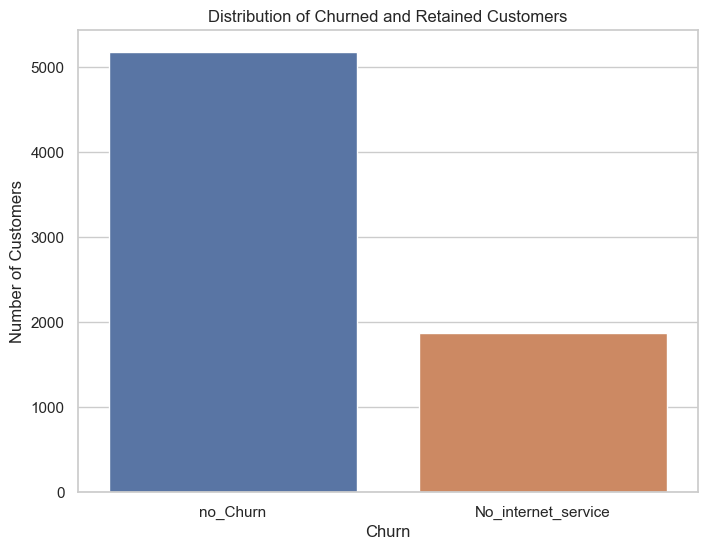

In [704]:
churn_counts = df.Churn.value_counts()
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribution of Churned and Retained Customers')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

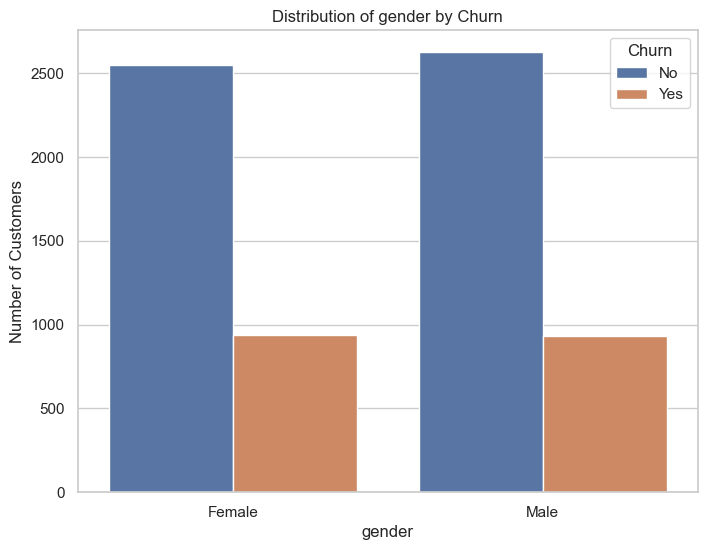

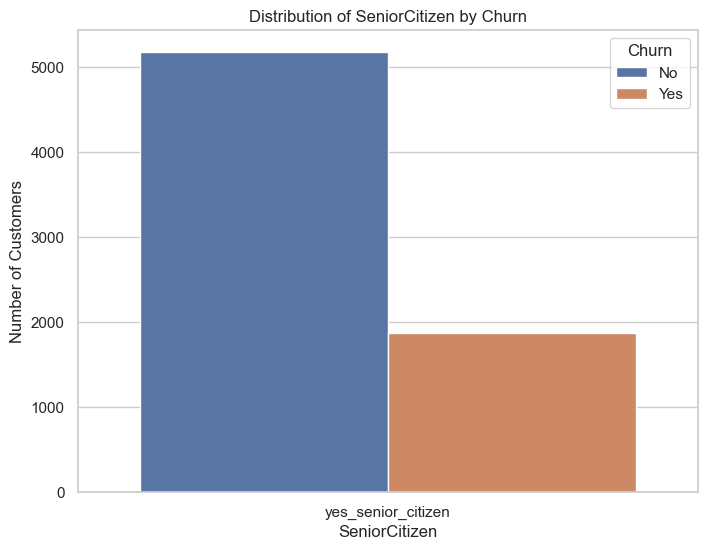

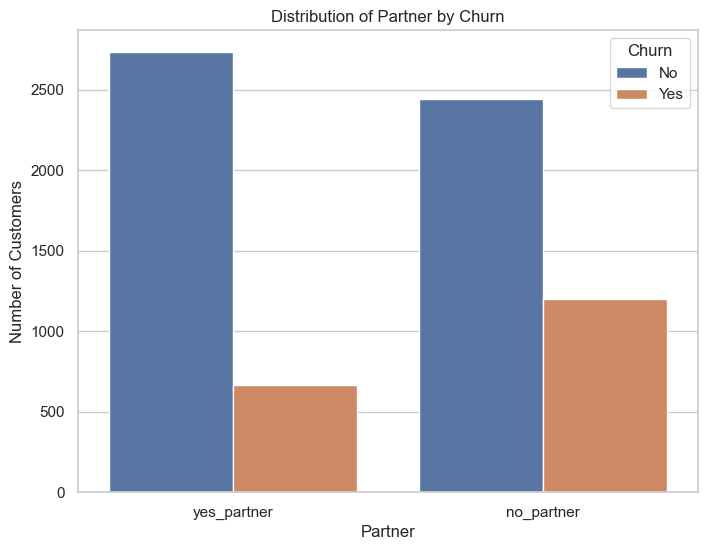

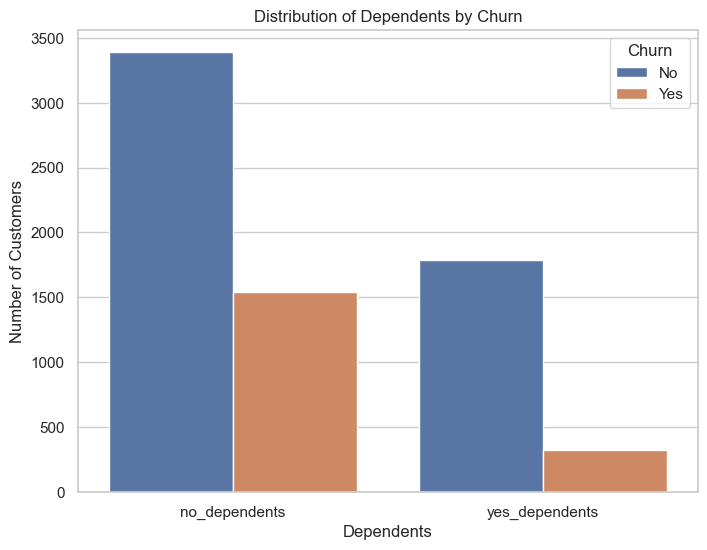

In [705]:
demographic_attributes = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for attribute in demographic_attributes:
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    sns.countplot(data=df, x=attribute, hue='Churn')
    plt.title(f'Distribution of {attribute} by Churn')
    plt.xlabel(attribute)
    plt.ylabel('Number of Customers')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.show()

In [ ]:
data = pd.concat([df, ])